# Quantum operation inversion at the pulse level

In [6]:
from gateinverse import InverseGate
from qiskit import QuantumCircuit, schedule
from qiskit import *
from qiskit.visualization.pulse_v2 import draw, IQXDebugging, IQXStandard, IQXSimple
 
from qiskit.test.mock import FakeJakarta


import sys, importlib

# sys.path.append("/usr/people/raamu/jader/MEGA/classes")
sys.path.append("/home/jader/MEGA/classes")

from kik_pulse_gate2 import *

##### In this example, we shall use a mock backend (FakeJakarta) to produce the inverse of the entangling gate $CX(0,1)$.

In [7]:
backend = FakeJakarta()

##### Remember, the first input in InverseGate must a default gate in the backend you are going to use. Here is the list of gates defined in the backend. 

In [8]:
print(backend.defaults().instruction_schedule_map)

<InstructionScheduleMap(1Q instructions:
  q0: {'measure', 'u1', 'x', 'rz', 'id', 'sx', 'u3', 'u2'}
  q1: {'measure', 'u1', 'x', 'rz', 'id', 'sx', 'u3', 'u2'}
  q2: {'measure', 'u1', 'x', 'rz', 'id', 'sx', 'u3', 'u2'}
  q3: {'measure', 'u1', 'x', 'rz', 'id', 'sx', 'u3', 'u2'}
  q4: {'measure', 'u1', 'x', 'rz', 'id', 'sx', 'u3', 'u2'}
  q5: {'measure', 'u1', 'x', 'rz', 'id', 'sx', 'u3', 'u2'}
  q6: {'measure', 'u1', 'x', 'rz', 'id', 'sx', 'u3', 'u2'}
Multi qubit instructions:
  (0, 1): {'cx'}
  (1, 0): {'cx'}
  (1, 2): {'cx'}
  (1, 3): {'cx'}
  (2, 1): {'cx'}
  (3, 1): {'cx'}
  (3, 5): {'cx'}
  (4, 5): {'cx'}
  (5, 3): {'cx'}
  (5, 4): {'cx'}
  (5, 6): {'cx'}
  (6, 5): {'cx'}
  (0, 1, 2, 3, 4, 5, 6): {'measure'}
)>


##### Now, the inversion of the $CX(0,1)$ 

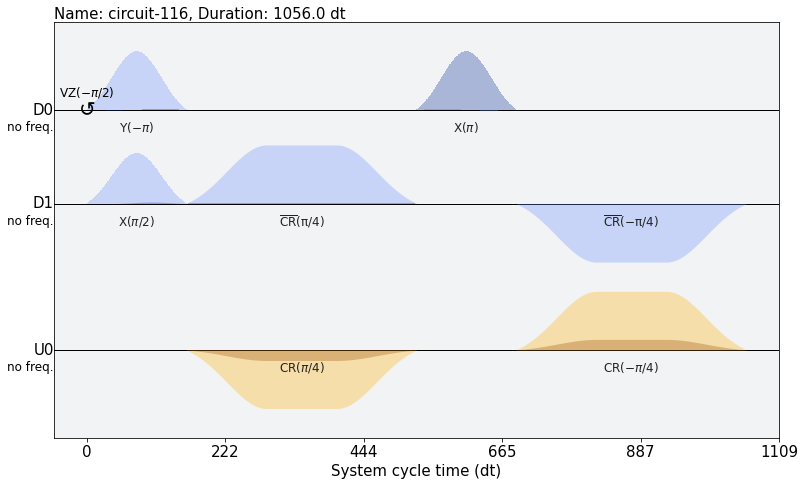

In [13]:
qc0 = QuantumCircuit(2)
qc0.cx(0,1)
qc0 = transpile(qc0, backend)
sch0 = schedule(qc0, backend)
sch0.draw()

In [27]:
sch0.duration

1056

In [14]:
sch0.instructions

((0, ShiftPhase(1.5707963267948966, DriveChannel(0))),
 (0, ShiftPhase(1.5707963267948966, ControlChannel(1))),
 (0,
  Play(Drag(duration=160, amp=(-3.6963723967913305e-17-0.2012211411684789j), sigma=40, beta=-1.0205387662332952, name='Ym_d0'), DriveChannel(0), name='Ym_d0')),
 (0,
  Play(Drag(duration=160, amp=(0.09681604132521475+0.002014600463496705j), sigma=40, beta=-0.968549607705977, name='X90p_d1'), DriveChannel(1), name='X90p_d1')),
 (160,
  Play(GaussianSquare(duration=368, amp=(0.11224059989953047+0.0016941472743981524j), sigma=64, width=112, name='CR90p_d1_u0'), DriveChannel(1), name='CR90p_d1_u0')),
 (160,
  Play(GaussianSquare(duration=368, amp=(-0.7605539202883588-0.1369139350905537j), sigma=64, width=112, name='CR90p_u0'), ControlChannel(0), name='CR90p_u0')),
 (528,
  Play(Drag(duration=160, amp=(0.2012211411684789+0j), sigma=40, beta=-1.0205387662332952, name='Xp_d0'), DriveChannel(0), name='Xp_d0')),
 (688,
  Play(GaussianSquare(duration=368, amp=(-0.11224059989953047

In [16]:
1056-160

896

In [15]:
cx_inv = InverseGate('cx', [0,1], backend).gate
qc = QuantumCircuit(2)
qc = qc.compose(cx_inv, [0,1])
qc = transpile(qc, backend)
sch = schedule(qc, backend)
# sch.draw()
sch.instructions

((0,
  Play(GaussianSquare(duration=368, amp=(0.11224059989953047+0.0016941472743981388j), sigma=64, width=112, name='CR90m_d1_u0'), DriveChannel(1), name='CR90m_d1_u0')),
 (0,
  Play(GaussianSquare(duration=368, amp=(-0.7605539202883588-0.1369139350905536j), sigma=64, width=112, name='CR90m_u0'), ControlChannel(0), name='CR90m_u0')),
 (368,
  Play(Drag(duration=160, amp=(-0.2012211411684789-0j), sigma=40, beta=-1.0205387662332952, name='Xp_d0'), DriveChannel(0), name='Xp_d0')),
 (528,
  Play(GaussianSquare(duration=368, amp=(-0.11224059989953047-0.0016941472743981524j), sigma=64, width=112, name='CR90p_d1_u0'), DriveChannel(1), name='CR90p_d1_u0')),
 (528,
  Play(GaussianSquare(duration=368, amp=(0.7605539202883588+0.1369139350905537j), sigma=64, width=112, name='CR90p_u0'), ControlChannel(0), name='CR90p_u0')),
 (896, ShiftPhase(-1.5707963267948966, ControlChannel(1))),
 (896,
  Play(Drag(duration=160, amp=(3.6963723967913305e-17+0.2012211411684789j), sigma=40, beta=-1.02053876623329

In [ ]:
# Using my code

In [ ]:
sch_my = schedule(Kik2(transpile(qc0, optimization_level = 0, seed_transpiler = 0, backend = backend), backend).ki(),backend)

In [ ]:
sch_my.instructions

((0,
  Play(GaussianSquare(duration=368, amp=(0.11224059989953047+0.0016941472743981388j), sigma=64, width=112, name='CR90m_d1_u0'), DriveChannel(1), name='CR90m_d1_u0')),
 (0,
  Play(GaussianSquare(duration=368, amp=(-0.7605539202883588-0.1369139350905536j), sigma=64, width=112, name='CR90m_u0'), ControlChannel(0), name='CR90m_u0')),
 (368,
  Play(Drag(duration=160, amp=(-0.2012211411684789-0j), sigma=40, beta=-1.0205387662332952, name='Xp_d0'), DriveChannel(0), name='Xp_d0')),
 (528,
  Play(GaussianSquare(duration=368, amp=(-0.11224059989953047-0.0016941472743981524j), sigma=64, width=112, name='CR90p_d1_u0'), DriveChannel(1), name='CR90p_d1_u0')),
 (528,
  Play(GaussianSquare(duration=368, amp=(0.7605539202883588+0.1369139350905537j), sigma=64, width=112, name='CR90p_u0'), ControlChannel(0), name='CR90p_u0')),
 (896,
  Play(Drag(duration=160, amp=(3.6963723967913305e-17+0.2012211411684789j), sigma=40, beta=-1.0205387662332952, name='Ym_d0'), DriveChannel(0), name='Ym_d0')),
 (896,
 

In [ ]:
sch.instructions

((0,
  Play(GaussianSquare(duration=368, amp=(0.11224059989953047+0.0016941472743981388j), sigma=64, width=112, name='CR90m_d1_u0'), DriveChannel(1), name='CR90m_d1_u0')),
 (0,
  Play(GaussianSquare(duration=368, amp=(-0.7605539202883588-0.1369139350905536j), sigma=64, width=112, name='CR90m_u0'), ControlChannel(0), name='CR90m_u0')),
 (368,
  Play(Drag(duration=160, amp=(-0.2012211411684789-0j), sigma=40, beta=-1.0205387662332952, name='Xp_d0'), DriveChannel(0), name='Xp_d0')),
 (528,
  Play(GaussianSquare(duration=368, amp=(-0.11224059989953047-0.0016941472743981524j), sigma=64, width=112, name='CR90p_d1_u0'), DriveChannel(1), name='CR90p_d1_u0')),
 (528,
  Play(GaussianSquare(duration=368, amp=(0.7605539202883588+0.1369139350905537j), sigma=64, width=112, name='CR90p_u0'), ControlChannel(0), name='CR90p_u0')),
 (896, ShiftPhase(-1.5707963267948966, ControlChannel(1))),
 (896,
  Play(Drag(duration=160, amp=(3.6963723967913305e-17+0.2012211411684789j), sigma=40, beta=-1.02053876623329

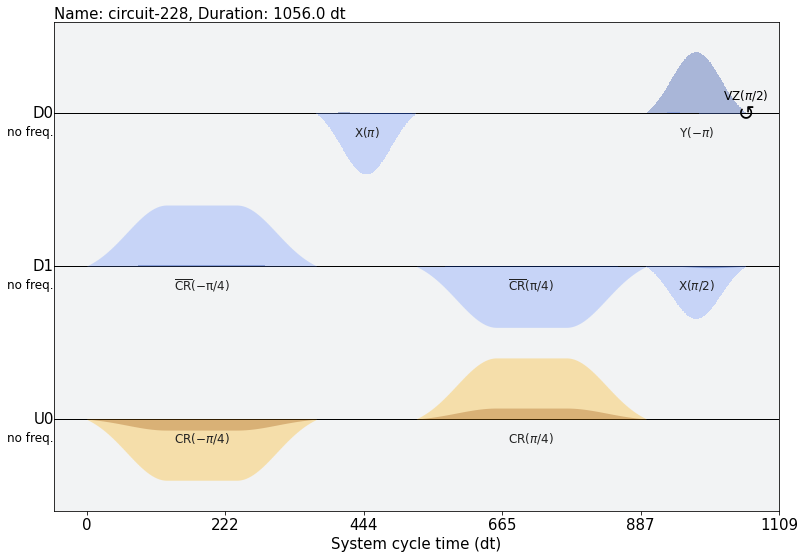

In [ ]:
sch.draw()

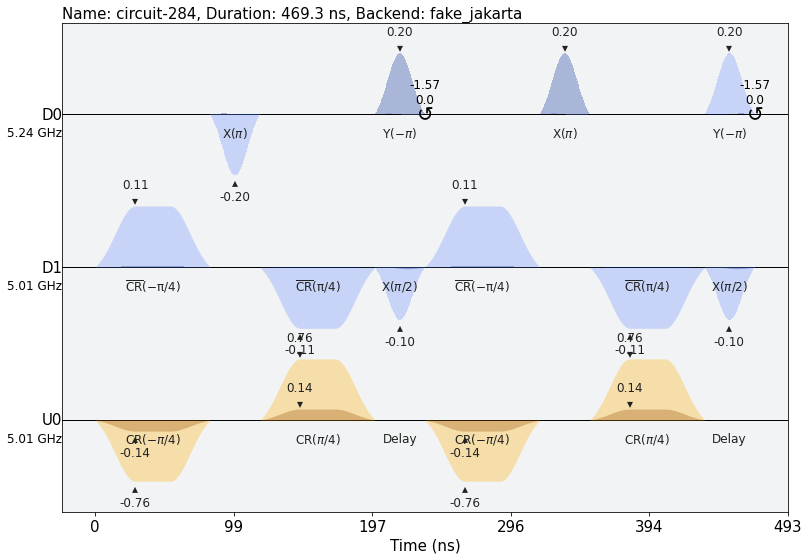

In [ ]:
sch_my.draw(style=IQXDebugging(), backend=backend)

In [ ]:
sch0.instructions

((0, ShiftPhase(-1.5707963267948966, DriveChannel(0))),
 (0, ShiftPhase(-3.141592653589793, DriveChannel(1))),
 (0, ShiftPhase(-3.141592653589793, ControlChannel(0))),
 (0, ShiftPhase(-1.5707963267948966, ControlChannel(1))),
 (0, ShiftPhase(-3.141592653589793, ControlChannel(4))),
 (0, ShiftPhase(-3.141592653589793, ControlChannel(5))),
 (0,
  Play(Drag(duration=160, amp=(0.10071510501707717+0.000839077905344422j), sigma=40, beta=-1.0522991222950833, name='X90p_d0'), DriveChannel(0), name='X90p_d0')),
 (0,
  Play(Drag(duration=160, amp=(-0.0020146004634966934+0.09681604132521475j), sigma=40, beta=-0.968549607705977, name='Y90p_d1'), DriveChannel(1), name='Y90p_d1')),
 (160,
  Play(GaussianSquare(duration=368, amp=(0.11224059989953047+0.0016941472743981524j), sigma=64, width=112, name='CR90p_d1_u0'), DriveChannel(1), name='CR90p_d1_u0')),
 (160,
  Play(GaussianSquare(duration=368, amp=(-0.7605539202883588-0.1369139350905537j), sigma=64, width=112, name='CR90p_u0'), ControlChannel(0), n